In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import xgboost as xgb

In [34]:
data_train = pd.read_csv('/content/train_Df64byy.csv')
data_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [35]:
data_train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [36]:
print('Null value in train data: ',data_train.isnull().sum().sum())
data_train.isnull().sum()

Null value in train data:  52193


ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [37]:
#impute NaN with some string 
#impute Health Indicator feature NaN with 'No Health Indicator'
#impute Holding_Policy_Duration feature NaN with 'No Holding_Policy_Duration'
#impute Holding_Policy_Type feature NaN with -1
data_train['Health Indicator'].fillna('No Health Indicator',inplace = True)
data_train['Holding_Policy_Duration'].fillna('No Holding_Policy_Duration',inplace = True)
data_train['Holding_Policy_Type'] = data_train['Holding_Policy_Type'].replace(to_replace = np.nan,value = -1)

In [38]:
data_train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

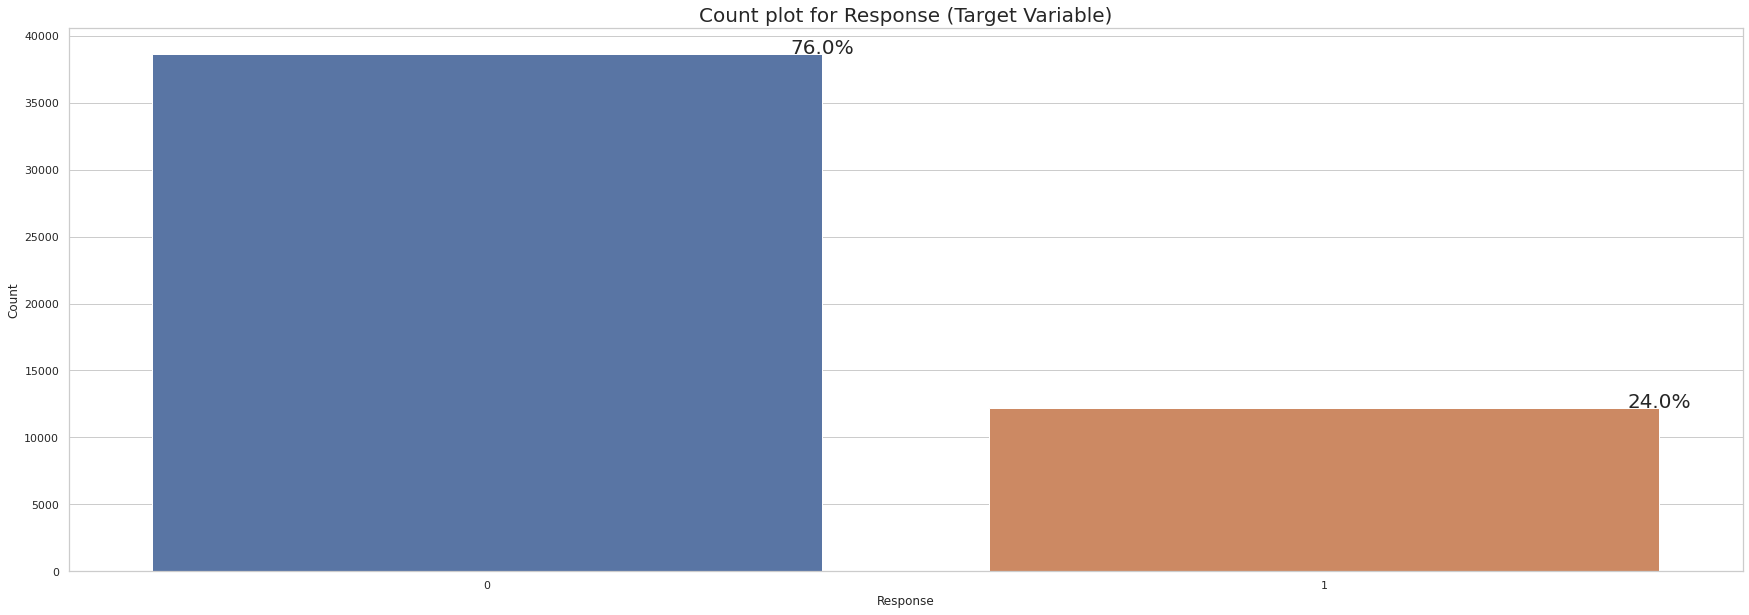

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,10))
total = data_train.shape[0]
ax = sns.countplot(x = 'Response',data = data_train)
ax.set_ylabel('')
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center',fontsize = 20)
  plt.ylabel('Count')
  plt.title('Count plot for Response (Target Variable)',fontdict = {'fontsize' : 20})

# Train-Test split

In [40]:
X = data_train.drop(['ID','Response'],axis = 1)
y = data_train['Response']


In [41]:
X_tr,X_test,y_tr,y_test =  train_test_split(X,y,test_size = 0.2,random_state = 100,stratify = y)
X_train,X_cv,y_train,y_cv =  train_test_split(X_tr,y_tr,test_size = 0.2,random_state = 100,stratify = y_tr)


print('shape of x_train : ',X_train.shape)
print('shape of y_train : ',y_train.shape)
print('shape of x_test  : ',X_test.shape)
print('shape of y_test  : ',y_test.shape)
print('shape of x_cv  : ',X_cv.shape)
print('shape of y_cv  : ',y_cv.shape)

shape of x_train :  (32564, 12)
shape of y_train :  (32564,)
shape of x_test  :  (10177, 12)
shape of y_test  :  (10177,)
shape of x_cv  :  (8141, 12)
shape of y_cv  :  (8141,)


In [42]:
print('Null value in train data: ',X_train.isnull().sum().sum())
print('Null value in test data: ',X_test.isnull().sum().sum())
print('Null value in test data: ',X_cv.isnull().sum().sum())

Null value in train data:  0
Null value in test data:  0
Null value in test data:  0


In [43]:
number_not_interested = y_train.value_counts()[0]
number_interested = y_train.value_counts()[1]
print('Number of people interested in policy is : ',number_interested )
print('Number of people not interested in policy is : ',number_not_interested )
print('Perecentage of people not interested in policy is : {} %'.format(round((number_not_interested/X_train.shape[0])*100,3)))
print('Perecentage of people interested in policy is : {} %'.format(round((number_interested/X_train.shape[0])*100,3)))

Number of people interested in policy is :  7814
Number of people not interested in policy is :  24750
Perecentage of people not interested in policy is : 76.004 %
Perecentage of people interested in policy is : 23.996 %


In [44]:
number_not_interested = y_test.value_counts()[0]
number_interested = y_test.value_counts()[1]
print('Number of people interested in policy is : ',number_interested )
print('Number of people not interested in policy is : ',number_not_interested )
print('Perecentage of people not interested in policy is : {} %'.format(round((number_not_interested/X_test.shape[0])*100,3)))
print('Perecentage of people interested in policy is : {} %'.format(round((number_interested/X_test.shape[0])*100,3)))

Number of people interested in policy is :  2442
Number of people not interested in policy is :  7735
Perecentage of people not interested in policy is : 76.005 %
Perecentage of people interested in policy is : 23.995 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


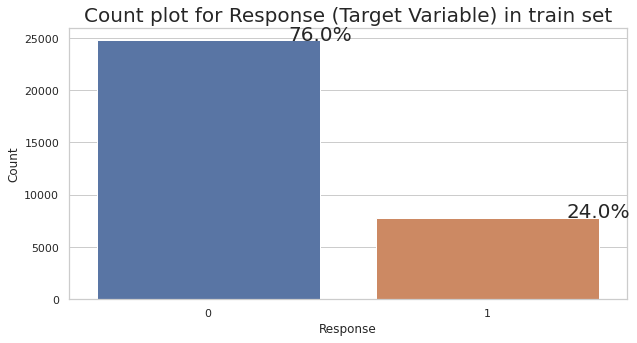

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = X_train.shape[0]
ax = sns.countplot(y_train)
ax.set_ylabel('')
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center',fontsize = 20)
  plt.ylabel('Count')
  plt.title('Count plot for Response (Target Variable) in train set',fontdict = {'fontsize' : 20})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


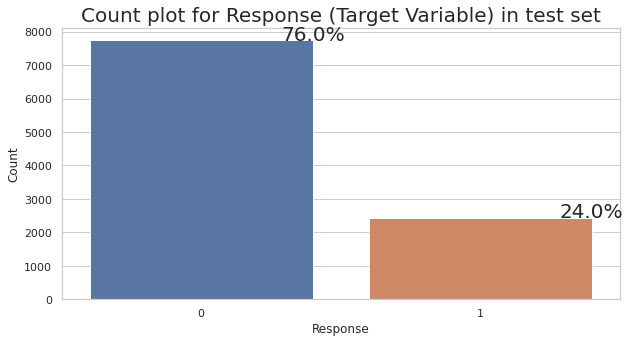

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
total = X_test.shape[0]
ax = sns.countplot(y_test)
ax.set_ylabel('')
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center',fontsize = 20)
  plt.ylabel('Count')
  plt.title('Count plot for Response (Target Variable) in test set',fontdict = {'fontsize' : 20})

In [47]:
categorical_features_train = list(X_train.select_dtypes(include=['object']).columns)
print("Number of Categorical features in Train data : {} features".format(len(categorical_features_train)))
continous_features_train = list(X_train.select_dtypes(include=['float','int']).columns)
print("Number of Continous features in Train data : {} features".format(len(continous_features_train)))

Number of Categorical features in Train data : 6 features
Number of Continous features in Train data : 6 features


In [48]:
categorical_features_train = list(X_test.select_dtypes(include=['object']).columns)
print("Number of Categorical features in Train data : {} features".format(len(categorical_features_train)))
continous_features_train = list(X_test.select_dtypes(include=['float','int']).columns)
print("Number of Continous features in Train data : {} features".format(len(continous_features_train)))

Number of Categorical features in Train data : 6 features
Number of Continous features in Train data : 6 features


# Feature Engineering

1. Categorical Variables (Response Encoding)

a . Region_Code:

In [49]:
def fit(alpha, feature, X,y):
  df = X.join(y)
  value_count = df[feature].value_counts()
  
  print('Unique levels in feature are : ',dict(value_count).keys())
  print('Total levels in feature are : ',len(dict(value_count).keys()))
  gv_dict = dict()
  #alpha = 1
  for i, denominator in value_count.items():
    vec = []
    for k in range(2):
      cls_cnt = df.loc[(df['Response'] == k) & (df[feature]==i)]
      vec.append((cls_cnt.shape[0] + 10*alpha)/ (denominator + 20*alpha))
    gv_dict[i]=vec
  return gv_dict

def transform(gv_dict, feature, df):
  #gv_dict = get_gv_fea_dict(alpha, feature, df)
  #value_count = data_train.Region_Code.value_counts()
  #print('Done')
  gv_fea = []
  for index, row in df.iterrows():
    #print(row[feature])
    if row[feature] in gv_dict.keys():
      #print(index)
      gv_fea.append(gv_dict[row[feature]])
    else:
      gv_fea.append([0.5,0.5])
  return gv_fea
  

In [50]:
map_region_code = fit(alpha = 1, feature = 'Region_Code',X = X_train, y = y_train)
tr_region_code_re = transform(gv_dict = map_region_code,feature = 'Region_Code',df = X_train)
cv_region_code_re = transform(gv_dict = map_region_code,feature = 'Region_Code',df = X_cv)
te_region_code_re = transform(gv_dict = map_region_code,feature = 'Region_Code',df = X_test)
df_tr_region_code_re = pd.DataFrame(tr_region_code_re,columns=['Region_code_0','Region_code_1'])
df_cv_region_code_re = pd.DataFrame(cv_region_code_re,columns=['Region_code_0','Region_code_1'])
df_te_region_code_re = pd.DataFrame(te_region_code_re,columns=['Region_code_0','Region_code_1'])
df_tr_region_code_re.head()

Unique levels in feature are :  dict_keys([1, 4, 2, 6, 10, 8, 5, 20, 7, 59, 22, 16, 19, 13, 18, 41, 29, 31, 14, 23, 55, 21, 42, 58, 24, 79, 66, 17, 15, 36, 25, 53, 34, 47, 28, 27, 32, 227, 102, 39, 72, 104, 54, 45, 63, 122, 52, 329, 69, 136, 81, 116, 56, 119, 127, 278, 231, 103, 70, 100, 277, 80, 209, 328, 218, 124, 133, 38, 74, 260, 111, 30, 289, 296, 40, 94, 93, 91, 217, 62, 117, 68, 105, 239, 147, 152, 44, 268, 243, 114, 140, 82, 198, 96, 264, 78, 83, 177, 179, 272, 113, 86, 138, 173, 262, 145, 77, 195, 196, 213, 401, 98, 186, 238, 303, 64, 123, 89, 151, 354, 37, 46, 50, 224, 200, 175, 275, 154, 95, 84, 219, 482, 134, 172, 167, 160, 193, 125, 75, 144, 258, 157, 393, 99, 206, 181, 582, 248, 143, 331, 241, 254, 204, 284, 339, 614, 470, 162, 153, 169, 185, 485, 469, 212, 244, 132, 208, 337, 232, 433, 313, 159, 88, 263, 199, 139, 87, 646, 310, 210, 446, 222, 293, 341, 306, 541, 234, 240, 245, 333, 323, 128, 451, 211, 607, 115, 1265, 383, 202, 26, 67, 431, 403, 242, 770, 290, 223, 381, 3

,Region_code_0,Region_code_1
0,0.523810,0.476190
1,0.583333,0.416667
2,0.575758,0.424242
3,0.607143,0.392857
4,0.607143,0.392857


In [51]:
map_city_code= fit(alpha = 1, feature = 'City_Code',X = X_train, y = y_train)

tr_city_code_re = transform(gv_dict = map_city_code,feature = 'City_Code',df = X_train)
cv_city_code_re = transform(gv_dict = map_city_code,feature = 'City_Code',df = X_cv)
te_city_code_re = transform(gv_dict = map_city_code,feature = 'City_Code',df = X_test)

df_tr_city_code_re = pd.DataFrame(tr_city_code_re,columns=['City_Code_0','City_Code_1'])
df_cv_city_code_re = pd.DataFrame(cv_city_code_re,columns=['City_Code_0','City_Code_1'])
df_te_city_code_re = pd.DataFrame(te_city_code_re,columns=['City_Code_0','City_Code_1'])

df_tr_city_code_re.head()

Unique levels in feature are :  dict_keys(['C1', 'C2', 'C3', 'C4', 'C9', 'C6', 'C7', 'C8', 'C10', 'C5', 'C15', 'C11', 'C17', 'C16', 'C13', 'C20', 'C19', 'C12', 'C18', 'C14', 'C21', 'C23', 'C24', 'C22', 'C26', 'C29', 'C25', 'C33', 'C27', 'C28', 'C32', 'C34', 'C30', 'C35', 'C36', 'C31'])
Total levels in feature are :  36


,City_Code_0,City_Code_1
0,0.771058,0.228942
1,0.752519,0.247481
2,0.752519,0.247481
3,0.752519,0.247481
4,0.773885,0.226115


In [52]:
map_health_indicatior = fit(alpha = 1, feature = 'Health Indicator',X = X_train, y = y_train)

tr_health_indicatior_re = transform(gv_dict = map_health_indicatior,feature = 'Health Indicator',df = X_train)
cv_health_indicatior_re = transform(gv_dict = map_health_indicatior,feature = 'Health Indicator',df = X_cv)
te_health_indicatior_re = transform(gv_dict = map_health_indicatior,feature = 'Health Indicator',df = X_test)

df_tr_health_indicatior_re = pd.DataFrame(tr_health_indicatior_re,columns=['Health Indicator_0','Health Indicator_1'])
df_cv_health_indicatior_re = pd.DataFrame(cv_health_indicatior_re,columns=['Health Indicator_0','Health Indicator_1'])
df_te_health_indicatior_re = pd.DataFrame(te_health_indicatior_re,columns=['Health Indicator_0','Health Indicator_1'])

df_tr_health_indicatior_re.head()

Unique levels in feature are :  dict_keys(['X1', 'No Health Indicator', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'])
Total levels in feature are :  10


,Health Indicator_0,Health Indicator_1
0,0.763870,0.236130
1,0.763870,0.236130
2,0.763870,0.236130
3,0.755134,0.244866
4,0.755134,0.244866


In [53]:
map_Holding_Policy_Duration = fit(alpha = 1, feature = 'Holding_Policy_Duration',X = X_train, y = y_train)

tr_Holding_Policy_Duration_re = transform(gv_dict = map_Holding_Policy_Duration,feature = 'Holding_Policy_Duration',df = X_train)
cv_Holding_Policy_Duration_re = transform(gv_dict = map_Holding_Policy_Duration,feature = 'Holding_Policy_Duration',df = X_cv)
te_Holding_Policy_Duration_re = transform(gv_dict = map_Holding_Policy_Duration,feature = 'Holding_Policy_Duration',df = X_test)

df_tr_Holding_Policy_Duration_re = pd.DataFrame(tr_Holding_Policy_Duration_re,columns=['Holding_Policy_Duration_0','Holding_Policy_Duration_1'])
df_cv_Holding_Policy_Duration_re = pd.DataFrame(cv_Holding_Policy_Duration_re,columns=['Holding_Policy_Duration_0','Holding_Policy_Duration_1'])
df_te_Holding_Policy_Duration_re = pd.DataFrame(te_Holding_Policy_Duration_re,columns=['Holding_Policy_Duration_0','Holding_Policy_Duration_1'])

df_tr_Holding_Policy_Duration_re.head()

Unique levels in feature are :  dict_keys(['No Holding_Policy_Duration', '1.0', '14+', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0'])
Total levels in feature are :  16


,Holding_Policy_Duration_0,Holding_Policy_Duration_1
0,0.759013,0.240987
1,0.780453,0.219547
2,0.759013,0.240987
3,0.780453,0.219547
4,0.759013,0.240987


In [54]:
onehot_encoder = OneHotEncoder(sparse=False)

OHE_reco_ins_type = onehot_encoder.fit(np.array(X_train['Reco_Insurance_Type']).reshape(-1,1))

OHE_tr_Reco_Insurance_Type = OHE_reco_ins_type.transform(np.array(X_train['Reco_Insurance_Type']).reshape(-1,1))
OHE_cv_Reco_Insurance_Type = OHE_reco_ins_type.transform(np.array(X_cv['Reco_Insurance_Type']).reshape(-1,1))
OHE_te_Reco_Insurance_Type = OHE_reco_ins_type.transform(np.array(X_test['Reco_Insurance_Type']).reshape(-1,1))

df_tr_Reco_Insurance_Type = pd.DataFrame(OHE_tr_Reco_Insurance_Type ,columns=['Reco_Insurance_type_Individual','Reco_Insurance_type_Joint'])
df_cv_Reco_Insurance_Type = pd.DataFrame(OHE_cv_Reco_Insurance_Type ,columns=['Reco_Insurance_type_Individual','Reco_Insurance_type_Joint'])
df_te_Reco_Insurance_Type = pd.DataFrame(OHE_te_Reco_Insurance_Type,columns=['Reco_Insurance_type_Individual','Reco_Insurance_type_Joint'])


df_tr_Reco_Insurance_Type.head()

,Reco_Insurance_type_Individual,Reco_Insurance_type_Joint
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [55]:
onehot_encoder.fit(np.array(X_train.Accomodation_Type).reshape(-1,1))

OHE_tr_Reco_Insurance_Type = onehot_encoder.transform(np.array(X_train.Accomodation_Type).reshape(-1,1))
OHE_cv_Reco_Insurance_Type = onehot_encoder.transform(np.array(X_cv.Accomodation_Type).reshape(-1,1))
OHE_te_Reco_Insurance_Type = onehot_encoder.transform(np.array(X_test.Accomodation_Type).reshape(-1,1))

df_tr_Reco_Insurance_Type = pd.DataFrame(OHE_tr_Reco_Insurance_Type ,columns=['Accomodation_type_Owned','Accomodation_type_Rented'])
df_cv_Reco_Insurance_Type = pd.DataFrame(OHE_cv_Reco_Insurance_Type ,columns=['Accomodation_type_Owned','Accomodation_type_Rented'])
df_te_Reco_Insurance_Type = pd.DataFrame(OHE_te_Reco_Insurance_Type,columns=['Accomodation_type_Owned','Accomodation_type_Rented'])


df_te_Reco_Insurance_Type.head(5)

,Accomodation_type_Owned,Accomodation_type_Rented
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [56]:

onehot_encoder.fit(np.array(X_train.Is_Spouse).reshape(-1,1))

OHE_tr_Is_Spouse = onehot_encoder.transform(np.array(X_train.Is_Spouse).reshape(-1,1))
OHE_cv_Is_Spouse = onehot_encoder.transform(np.array(X_cv.Is_Spouse).reshape(-1,1))
OHE_te_Is_Spouse = onehot_encoder.transform(np.array(X_test.Is_Spouse).reshape(-1,1))

df_tr_Is_Spouse = pd.DataFrame(OHE_tr_Is_Spouse ,columns=['Is_Spouse_No','Is_Spouse_Yes'])
df_cv_Is_Spouse = pd.DataFrame(OHE_cv_Is_Spouse ,columns=['Is_Spouse_No','Is_Spouse_Yes'])
df_te_Is_Spouse = pd.DataFrame(OHE_te_Is_Spouse,columns=['Is_Spouse_No','Is_Spouse_Yes'])


df_te_Is_Spouse.head(5)

,Is_Spouse_No,Is_Spouse_Yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [57]:
frames_tr1 = [df_tr_region_code_re,df_tr_city_code_re,df_tr_health_indicatior_re,df_tr_Holding_Policy_Duration_re,df_tr_Reco_Insurance_Type,df_tr_Is_Spouse]
frames_cv1 = [df_cv_region_code_re,df_cv_city_code_re,df_cv_health_indicatior_re,df_cv_Holding_Policy_Duration_re,df_cv_Reco_Insurance_Type,df_cv_Is_Spouse]
frames_te1 = [df_te_region_code_re,df_te_city_code_re,df_te_health_indicatior_re,df_te_Holding_Policy_Duration_re,df_te_Reco_Insurance_Type,df_te_Is_Spouse]

train_cat_df = pd.concat(frames_tr1,axis = 1)
cv_cat_df = pd.concat(frames_cv1,axis = 1)
test_cat_df = pd.concat(frames_te1,axis = 1)

train_cat_df.shape,cv_cat_df.shape,test_cat_df.shape

((32564, 12), (8141, 12), (10177, 12))

# Continiuos Feature Encoding

In [58]:
continous_features_train

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium']

In [59]:
map_Holding_Policy_Type = fit(alpha = 1, feature = 'Holding_Policy_Type',X = X_train, y = y_train)

tr_Holding_Policy_Type_re = transform(gv_dict = map_Holding_Policy_Type,feature = 'Holding_Policy_Type',df = X_train)
cv_Holding_Policy_Type_re = transform(gv_dict = map_Holding_Policy_Type,feature = 'Holding_Policy_Type',df = X_cv)
te_Holding_Policy_Typen_re = transform(gv_dict = map_Holding_Policy_Type,feature = 'Holding_Policy_Type',df = X_test)

df_tr_Holding_Policy_Type_re = pd.DataFrame(tr_Holding_Policy_Type_re,columns=['Holding_Policy_Type_0','Holding_Policy_Type_1'])
df_cv_Holding_Policy_Type_re = pd.DataFrame(cv_Holding_Policy_Type_re,columns=['Holding_Policy_Type_0','Holding_Policy_Type_1'])
df_te_Holding_Policy_Type_re = pd.DataFrame(te_Holding_Policy_Duration_re,columns=['Holding_Policy_Type_0','Holding_Policy_Type_1'])

df_te_Holding_Policy_Type_re.head()

Unique levels in feature are :  dict_keys([-1.0, 3.0, 1.0, 2.0, 4.0])
Total levels in feature are :  5


,Holding_Policy_Type_0,Holding_Policy_Type_1
0,0.759471,0.240529
1,0.766582,0.233418
2,0.759013,0.240987
3,0.752137,0.247863
4,0.759013,0.240987


In [60]:
map_Reco_Policy_Cat = fit(alpha = 1, feature = 'Reco_Policy_Cat',X = X_train, y = y_train)

tr_Reco_Policy_Cat_re = transform(gv_dict = map_Reco_Policy_Cat,feature = 'Reco_Policy_Cat',df = X_train)
cv_Reco_Policy_Cat_re = transform(gv_dict = map_Reco_Policy_Cat,feature = 'Reco_Policy_Cat',df = X_cv)
te_Reco_Policy_Cat_re= transform(gv_dict = map_Reco_Policy_Cat,feature = 'Reco_Policy_Cat',df = X_test)

df_tr_Reco_Policy_Cat_re = pd.DataFrame(tr_Reco_Policy_Cat_re,columns=['Reco_Policy_Cat_0','Reco_Policy_Cat_1'])
df_cv_Reco_Policy_Cat_re = pd.DataFrame(cv_Reco_Policy_Cat_re,columns=['Reco_Policy_Cat_0','Reco_Policy_Cat_1'])
df_te_Reco_Policy_Cat_re = pd.DataFrame(te_Reco_Policy_Cat_re,columns=['Reco_Policy_Cat_0','Reco_Policy_Cat_1'])

df_te_Reco_Policy_Cat_re.head()

Unique levels in feature are :  dict_keys([22, 18, 21, 16, 17, 19, 20, 12, 1, 2, 14, 13, 15, 3, 4, 5, 6, 9, 7, 10, 8, 11])
Total levels in feature are :  22


,Reco_Policy_Cat_0,Reco_Policy_Cat_1
0,0.809304,0.190696
1,0.747475,0.252525
2,0.775522,0.224478
3,0.766194,0.233806
4,0.988871,0.011129


In [61]:
train_transf = np.log(X_train.Reco_Policy_Premium.values)
cv_transf = np.log(X_cv.Reco_Policy_Premium.values)
test_transf = np.log(X_test.Reco_Policy_Premium.values)


train_Reco_Policy_Premium_MIN = train_transf.min()
train_Reco_Policy_Premium_MAX = train_transf.max()

norm_tr_Reco_Policy_Premium = (train_transf - train_Reco_Policy_Premium_MIN )/(train_Reco_Policy_Premium_MAX-train_Reco_Policy_Premium_MIN)
norm_cv_Reco_Policy_Premium = (cv_transf - train_Reco_Policy_Premium_MIN )/(train_Reco_Policy_Premium_MAX-train_Reco_Policy_Premium_MIN)
norm_te_Reco_Policy_Premium = (test_transf  - train_Reco_Policy_Premium_MIN )/(train_Reco_Policy_Premium_MAX-train_Reco_Policy_Premium_MIN)

df_tr_Reco_Policy_Premium = pd.DataFrame(norm_tr_Reco_Policy_Premium,columns=['Reco_Policy_Premium'])
df_cv_Reco_Policy_Premium = pd.DataFrame(norm_cv_Reco_Policy_Premium,columns=['Reco_Policy_Premium'])
df_te_Reco_Policy_Premium = pd.DataFrame(norm_te_Reco_Policy_Premium,columns=['Reco_Policy_Premium'])

df_te_Reco_Policy_Premium.head()

,Reco_Policy_Premium
0,0.787730
1,0.728426
2,0.461498
3,0.629173
4,0.706356


In [62]:
train_transf = np.log(X_train.Upper_Age.values)
cv_transf = np.log(X_cv.Upper_Age.values)
test_transf = np.log(X_test.Upper_Age.values)


train_Upper_Age_MIN = train_transf.min()
train_Upper_Age_MAX = train_transf.max()

norm_tr_Upper_Age = (train_transf - train_Upper_Age_MIN )/(train_Upper_Age_MAX-train_Upper_Age_MIN)
norm_cv_Upper_Age = (cv_transf - train_Upper_Age_MIN )/(train_Upper_Age_MAX-train_Upper_Age_MIN)
norm_te_Upper_Age = (test_transf  - train_Upper_Age_MIN )/(train_Upper_Age_MAX-train_Upper_Age_MIN)

df_tr_Upper_Age = pd.DataFrame(norm_tr_Upper_Age,columns=['Upper_Age'])
df_cv_Upper_Age = pd.DataFrame(norm_cv_Upper_Age,columns=['Upper_Age'])
df_te_Upper_Age = pd.DataFrame(norm_te_Upper_Age,columns=['Upper_Age'])

df_te_Upper_Age.head()

,Upper_Age
0,1.000000
1,0.961595
2,0.140613
3,0.941573
4,0.715885


In [63]:
train_transf = np.log(X_train.Lower_Age.values)
cv_transf = np.log(X_cv.Lower_Age.values)
test_transf = np.log(X_test.Lower_Age.values)


train_Lower_Age_MIN = train_transf.min()
train_Lower_Age_MAX = train_transf.max()

norm_tr_Lower_Age = (train_transf - train_Lower_Age_MIN )/(train_Lower_Age_MAX-train_Lower_Age_MIN)
norm_cv_Lower_Age = (cv_transf - train_Lower_Age_MIN )/(train_Lower_Age_MAX-train_Lower_Age_MIN)
norm_te_Lower_Age = (test_transf  - train_Lower_Age_MIN )/(train_Lower_Age_MAX-train_Lower_Age_MIN)

df_tr_Lower_Age = pd.DataFrame(norm_tr_Lower_Age,columns=['Lower_Age'])
df_cv_Lower_Age = pd.DataFrame(norm_cv_Lower_Age,columns=['Lower_Age'])
df_te_Lower_Age = pd.DataFrame(norm_te_Lower_Age,columns=['Lower_Age'])

df_te_Lower_Age.head()

,Lower_Age
0,1.000000
1,0.964523
2,0.206132
3,0.946028
4,0.737546


In [64]:
frames_tr2 = [df_tr_Holding_Policy_Type_re,df_tr_Reco_Policy_Cat_re,df_tr_Reco_Policy_Premium,df_tr_Upper_Age,df_tr_Lower_Age]
frames_cv2 = [df_cv_Holding_Policy_Type_re,df_cv_Reco_Policy_Cat_re,df_cv_Reco_Policy_Premium,df_cv_Upper_Age,df_cv_Lower_Age]
frames_te2 = [df_te_Holding_Policy_Type_re,df_te_Reco_Policy_Cat_re,df_te_Reco_Policy_Premium,df_te_Upper_Age,df_te_Lower_Age]

train_cont_df = pd.concat(frames_tr2,axis = 1)
cv_cont_df = pd.concat(frames_cv2,axis = 1)
test_cont_df = pd.concat(frames_te2,axis = 1)

cv_cont_df.shape

(8141, 7)

# combined Dataframe

In [65]:
train_df = pd.concat([train_cat_df,train_cont_df],axis = 1)
cv_df = pd.concat([cv_cat_df,cv_cont_df],axis = 1)
test_df = pd.concat([test_cat_df,test_cont_df],axis = 1)

train_df.shape,test_df.shape,cv_df.shape

((32564, 19), (10177, 19), (8141, 19))

Text(0.5, 1.0, 'Correlation heatmap')

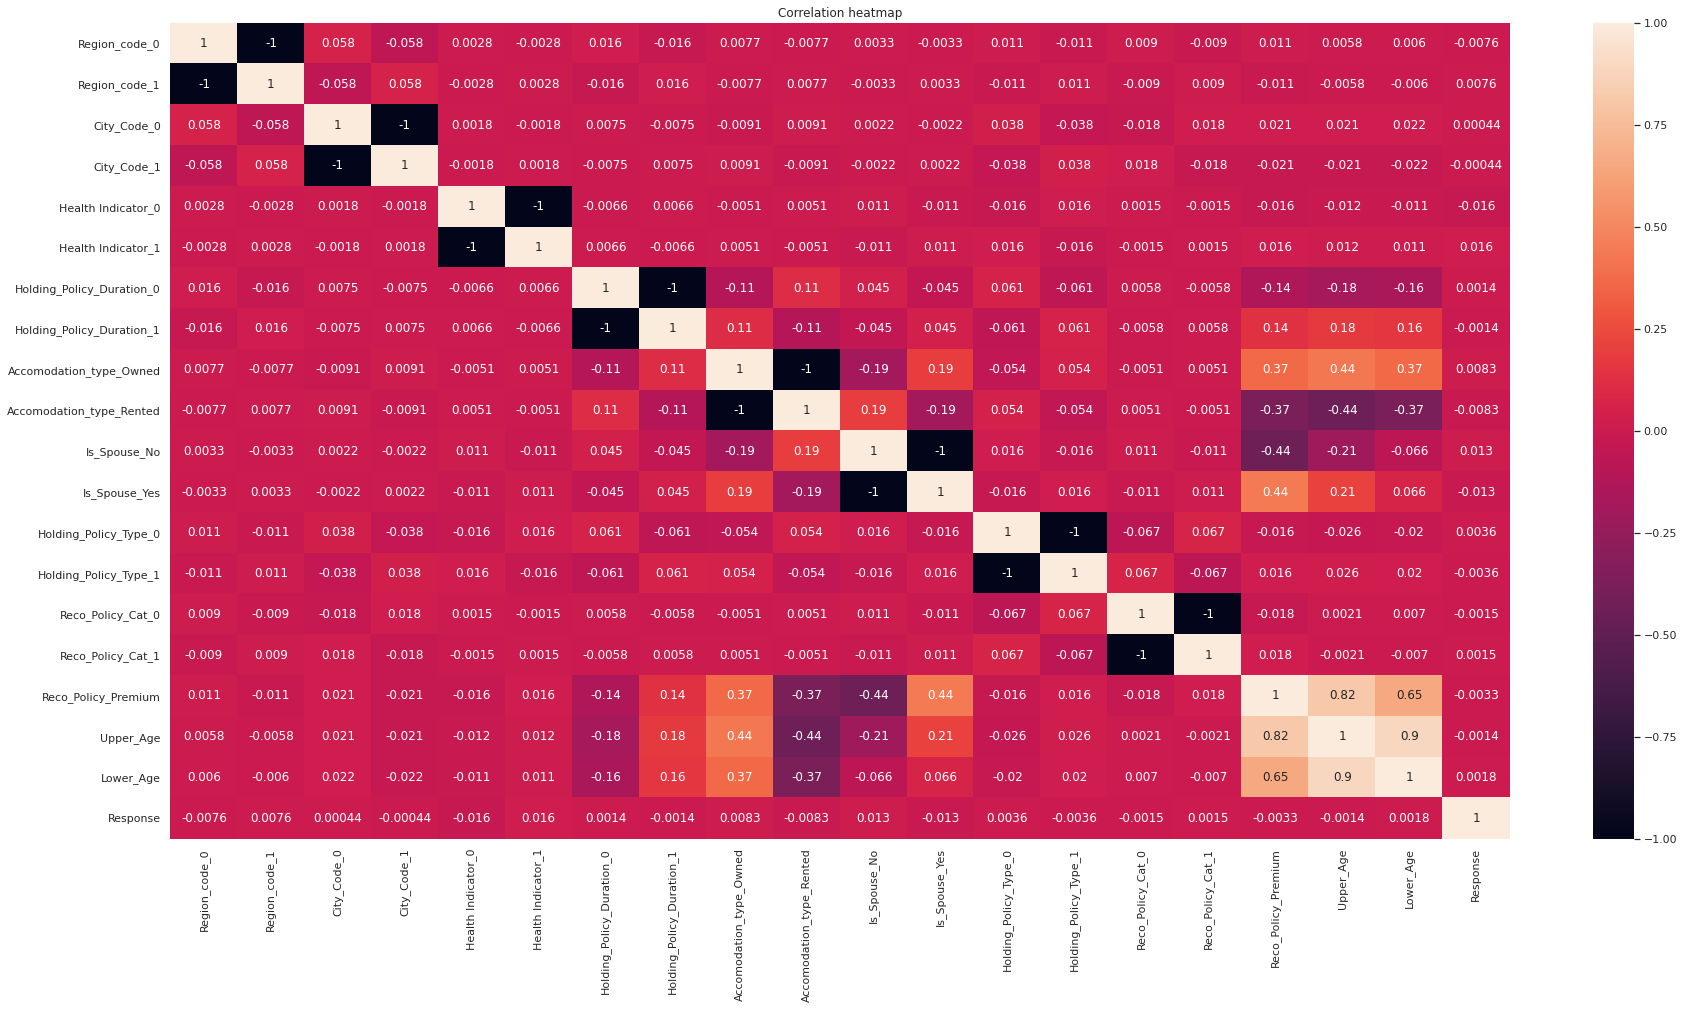

In [66]:
df1 = train_df.join(y_train)
plt.figure(figsize = (30,15))
correlation = df1.corr()
sns.heatmap(correlation,annot=True)
plt.title('Correlation heatmap')

# Modeling

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    
    labels = [0,1]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(3,3))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()


    re = C[1][1]/C[1,:].sum()
    pr = C[1][1]/C[:,1].sum()

    print('Precision : ',pr)
    print('Recall : ',re)

def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Roc AUC score :",roc_auc_score(test_y, sig_clf.predict_proba(test_x)[:,1]))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=25)

#Train the model using the training sets
knn.fit(train_df, y_train)

#Predict the response for test dataset
y_pred = knn.predict(test_df)
y_pred_proba = knn.predict_proba(test_df)[:,1]

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.5810083927730986


for alpha = 5
roc_auc score : 0.5575815106853328
for alpha = 11
roc_auc score : 0.5670851053407301
for alpha = 15
roc_auc score : 0.5677589067057758
for alpha = 21
roc_auc score : 0.5676191899423128
for alpha = 31
roc_auc score : 0.569098524438725
for alpha = 41
roc_auc score : 0.5726328993135715
for alpha = 51
roc_auc score : 0.5737628384687208
for alpha = 99
roc_auc score : 0.5734153876604405
for alpha = 121
roc_auc score : 0.5732273058106617


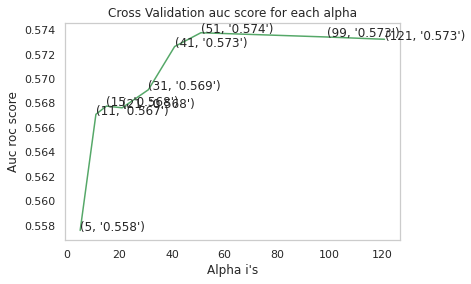

For values of best alpha =  51 The train roc auc score is: 0.7280603371829377
For values of best alpha =  51 The cross validation roc auc score is: 0.5737628384687208
For values of best alpha =  51 The test roc auc score is: 0.5872584490231549
-------------------- Confusion matrix --------------------


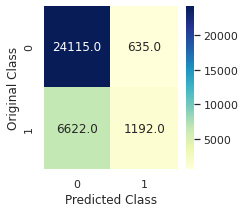

Precision :  0.6524356869184456
Recall :  0.15254671103148196
-------------------- Confusion matrix --------------------


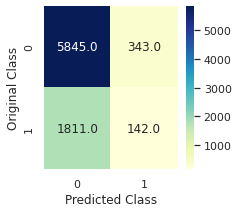

Precision :  0.2927835051546392
Recall :  0.07270865335381464
-------------------- Confusion matrix --------------------


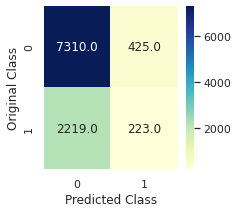

Precision :  0.3441358024691358
Recall :  0.09131859131859132


In [ ]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99,121]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)[:,1]
    cv_log_error_array.append(roc_auc_score(y_cv,sig_clf_probs))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("roc_auc score :",roc_auc_score(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation auc score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Auc roc score")
plt.show()


best_alpha = np.argmax(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y_tr = sig_clf.predict_proba(train_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The train roc auc score is:",roc_auc_score(y_train, predict_y_tr))
predict_y_cv = sig_clf.predict_proba(cv_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The cross validation roc auc score is:",roc_auc_score(y_cv, predict_y_cv ))
predict_y_te = sig_clf.predict_proba(test_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The test roc auc score is:",roc_auc_score(y_test, predict_y_te))
 

plot_confusion_matrix(test_y = y_train, predict_y =sig_clf.predict(train_df) )
plot_confusion_matrix(test_y=y_cv, predict_y = sig_clf.predict(cv_df))
plot_confusion_matrix(test_y=y_test, predict_y = sig_clf.predict(test_df))


Roc AUC score : 0.5737628384687208
Number of mis-classified points : 0.26458666011546494
-------------------- Confusion matrix --------------------


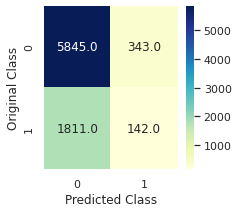

Precision :  0.2927835051546392
Recall :  0.07270865335381464


In [ ]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_df, y_train , cv_df, y_cv, clf)

# 2. Logistic Regression

1. With Balanced class

1.a Hyperparameter Tunning

for alpha = 1e-06
roc_auc score : 0.5578848578306426
for alpha = 1e-05
roc_auc score : 0.5578848578306426
for alpha = 0.0001
roc_auc score : 0.5578848578306426
for alpha = 0.001
roc_auc score : 0.5578848578306426
for alpha = 0.01
roc_auc score : 0.5578848578306426
for alpha = 0.1
roc_auc score : 0.5578848578306426
for alpha = 1
roc_auc score : 0.5578848578306426
for alpha = 10
roc_auc score : 0.5578848578306426
for alpha = 100
roc_auc score : 0.5578848578306426


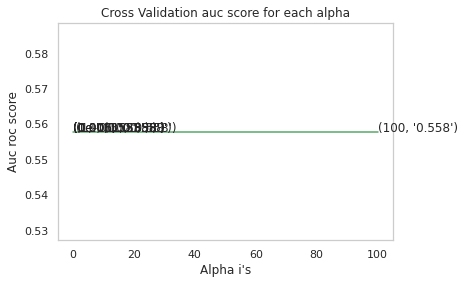

For values of best alpha =  1e-06 The train roc auc score is: 0.70764903708185
For values of best alpha =  1e-06 The cross validation roc auc score is: 0.5776126000441534
For values of best alpha =  1e-06 The test roc auc score is: 0.5890206772559713
-------------------- Confusion matrix --------------------


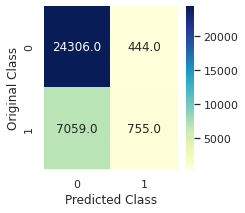

Precision :  0.6296914095079232
Recall :  0.09662144868185309
-------------------- Confusion matrix --------------------


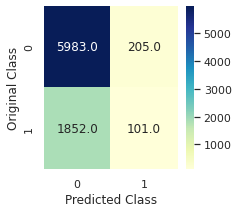

Precision :  0.3300653594771242
Recall :  0.051715309779825906
-------------------- Confusion matrix --------------------


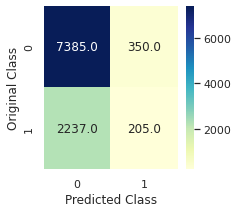

Precision :  0.36936936936936937
Recall :  0.08394758394758395


In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------

#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf =SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
    clf.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)[:,1]
    cv_log_error_array.append(roc_auc_score(y_cv,sig_clf_probs))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("roc_auc score :",roc_auc_score(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation auc score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Auc roc score")
plt.show()


best_alpha = np.argmax(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y_tr = sig_clf.predict_proba(train_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The train roc auc score is:",roc_auc_score(y_train, predict_y_tr))
predict_y_cv = sig_clf.predict_proba(cv_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The cross validation roc auc score is:",roc_auc_score(y_cv, predict_y_cv ))
predict_y_te = sig_clf.predict_proba(test_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The test roc auc score is:",roc_auc_score(y_test, predict_y_te))
 

plot_confusion_matrix(test_y = y_train, predict_y =sig_clf.predict(train_df) )
plot_confusion_matrix(test_y=y_cv, predict_y = sig_clf.predict(cv_df))
plot_confusion_matrix(test_y=y_test, predict_y = sig_clf.predict(test_df))


Roc AUC score : 0.5776126000441534
Number of mis-classified points : 0.2526716619579904
-------------------- Confusion matrix --------------------


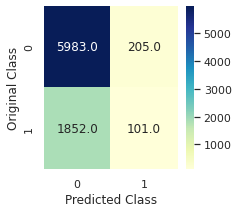

Precision :  0.3300653594771242
Recall :  0.051715309779825906


In [ ]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train , cv_df, y_cv, clf)

b. Without class imbalancing

for alpha = 1e-06
roc_auc score : 0.5683821088402276
for alpha = 1e-05
roc_auc score : 0.5694166003870531
for alpha = 0.0001
roc_auc score : 0.5723685669470435
for alpha = 0.001
roc_auc score : 0.5832673847040885
for alpha = 0.01
roc_auc score : 0.595452821327042
for alpha = 0.1
roc_auc score : 0.5726979791089307
for alpha = 1
roc_auc score : 0.5124210147251622
for alpha = 10
roc_auc score : 0.5061788983583508
for alpha = 100
roc_auc score : 0.5056397248725792


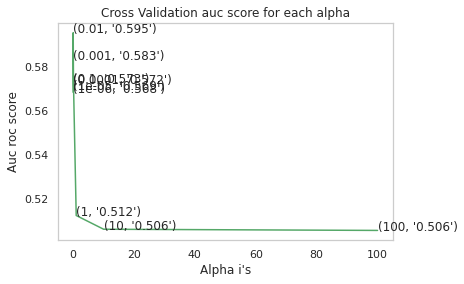

For values of best alpha =  0.01 The train roc auc score is: 0.7022766234135571
For values of best alpha =  0.01 The cross validation roc auc score is: 0.595452821327042
For values of best alpha =  0.01 The test roc auc score is: 0.6090930267400855
-------------------- Confusion matrix --------------------


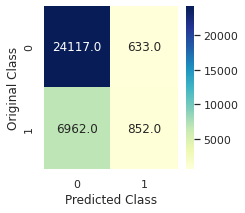

Precision :  0.5737373737373738
Recall :  0.10903506526746864


In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------

#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf =SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)[:,1]
    cv_log_error_array.append(roc_auc_score(y_cv,sig_clf_probs))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("roc_auc score :",roc_auc_score(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation auc score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Auc roc score")
plt.show()


best_alpha = np.argmax(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y_tr = sig_clf.predict_proba(train_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The train roc auc score is:",roc_auc_score(y_train, predict_y_tr))
predict_y_cv = sig_clf.predict_proba(cv_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The cross validation roc auc score is:",roc_auc_score(y_cv, predict_y_cv ))
predict_y_te = sig_clf.predict_proba(test_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The test roc auc score is:",roc_auc_score(y_test, predict_y_te))
 

plot_confusion_matrix(test_y = y_train, predict_y =sig_clf.predict(train_df) )
#plot_confusion_matrix(test_y=y_cv, predict_y = sig_clf.predict(cv_df))
#plot_confusion_matrix(test_y=y_test, predict_y = sig_clf.predict(test_df))


Roc AUC score : 0.595452821327042
Number of mis-classified points : 0.2541456823486058
-------------------- Confusion matrix --------------------


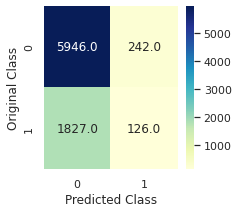

Precision :  0.3423913043478261
Recall :  0.06451612903225806


In [ ]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train , cv_df, y_cv, clf)

# 3. SVM:

for alpha = 1e-06
roc_auc score : 0.595976355802867
for alpha = 1e-05
roc_auc score : 0.595976355802867
for alpha = 0.0001
roc_auc score : 0.595976355802867
for alpha = 0.001
roc_auc score : 0.595976355802867
for alpha = 0.01
roc_auc score : 0.595976355802867
for alpha = 0.1
roc_auc score : 0.595976355802867
for alpha = 1
roc_auc score : 0.595976355802867
for alpha = 10
roc_auc score : 0.595976355802867
for alpha = 100
roc_auc score : 0.595976355802867


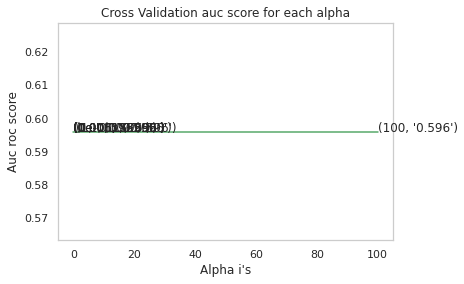

For values of best alpha =  1e-06 The train roc auc score is: 0.7075647180791793
For values of best alpha =  1e-06 The cross validation roc auc score is: 0.5753595069127734
For values of best alpha =  1e-06 The test roc auc score is: 0.5880331115625234
-------------------- Confusion matrix --------------------


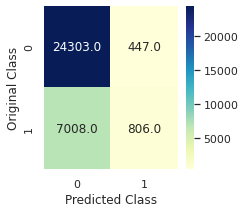

Precision :  0.6432561851556265
Recall :  0.10314819554645507


In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------

#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf =SGDClassifier( class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)[:,1]
    cv_log_error_array.append(roc_auc_score(y_cv,sig_clf_probs))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("roc_auc score :",roc_auc_score(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation auc score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Auc roc score")
plt.show()


best_alpha = np.argmax(cv_log_error_array)
clf = SGDClassifier( class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y_tr = sig_clf.predict_proba(train_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The train roc auc score is:",roc_auc_score(y_train, predict_y_tr))
predict_y_cv = sig_clf.predict_proba(cv_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The cross validation roc auc score is:",roc_auc_score(y_cv, predict_y_cv ))
predict_y_te = sig_clf.predict_proba(test_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The test roc auc score is:",roc_auc_score(y_test, predict_y_te))
 

plot_confusion_matrix(test_y = y_train, predict_y =sig_clf.predict(train_df) )
#plot_confusion_matrix(test_y=y_cv, predict_y = sig_clf.predict(cv_df))
#plot_confusion_matrix(test_y=y_test, predict_y = sig_clf.predict(test_df))


Roc AUC score : 0.5753595069127734
Number of mis-classified points : 0.25390001228350323
-------------------- Confusion matrix --------------------


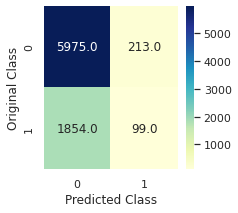

Precision :  0.3173076923076923
Recall :  0.05069124423963134


In [ ]:
clf = SGDClassifier( class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train , cv_df, y_cv, clf)

b. With imbalanced class:

for alpha = 1e-06
roc_auc score : 0.5650727619418322
for alpha = 1e-05
roc_auc score : 0.563032822723796
for alpha = 0.0001
roc_auc score : 0.5690868572408285
for alpha = 0.001
roc_auc score : 0.5682888540031397
for alpha = 0.01
roc_auc score : 0.568788888591003
for alpha = 0.1
roc_auc score : 0.5666082810295334
for alpha = 1
roc_auc score : 0.5764493555900442
for alpha = 10
roc_auc score : 0.5142842910530631
for alpha = 100
roc_auc score : 0.5055308310255451


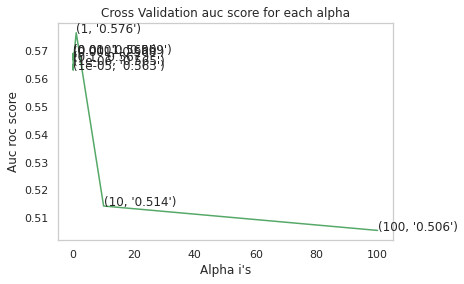

For values of best alpha =  1 The train roc auc score is: 0.680488121553389
For values of best alpha =  1 The cross validation roc auc score is: 0.5764493555900442
For values of best alpha =  1 The test roc auc score is: 0.5900368312133017
-------------------- Confusion matrix --------------------


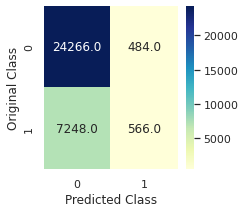

Precision :  0.539047619047619
Recall :  0.07243409265421039


In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------

#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf =SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)[:,1]
    cv_log_error_array.append(roc_auc_score(y_cv,sig_clf_probs))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("roc_auc score :",roc_auc_score(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation auc score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Auc roc score")
plt.show()


best_alpha = np.argmax(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y_tr = sig_clf.predict_proba(train_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The train roc auc score is:",roc_auc_score(y_train, predict_y_tr))
predict_y_cv = sig_clf.predict_proba(cv_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The cross validation roc auc score is:",roc_auc_score(y_cv, predict_y_cv ))
predict_y_te = sig_clf.predict_proba(test_df)[:,1]
print('For values of best alpha = ', alpha[best_alpha], "The test roc auc score is:",roc_auc_score(y_test, predict_y_te))
 

plot_confusion_matrix(test_y = y_train, predict_y =sig_clf.predict(train_df) )
#plot_confusion_matrix(test_y=y_cv, predict_y = sig_clf.predict(cv_df))
#plot_confusion_matrix(test_y=y_test, predict_y = sig_clf.predict(test_df))


Roc AUC score : 0.5764493555900442
Number of mis-classified points : 0.24947795111165705
-------------------- Confusion matrix --------------------


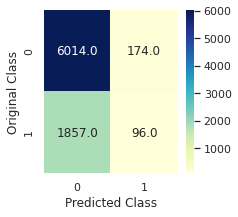

Precision :  0.35555555555555557
Recall :  0.04915514592933948


In [ ]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train , cv_df, y_cv, clf)

# 4. Decision Tree:

In [ ]:


max_depth = [5,7,10,25,50,75]
min_samples_split = [25,50,100,250,500,750]
min_samples_leaf =  [10,25,50,75,100]
cv_log_error_array = []
for i in max_depth:
  for j in min_samples_split:
    for k in min_samples_leaf:
      print("for max_depth =", i,"and min_samples_split = ", j,"and min_sample_leaf = ",k)
      clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf= j, min_samples_split= k,random_state=10)
      clf.fit(train_df,y_train)
      sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
      sig_clf.fit(train_df, y_train)
      sig_clf_probs = sig_clf.predict_proba(cv_df)[:,1]
      cv_log_error_array.append(roc_auc_score(y_cv,sig_clf_probs))
      # to avoid rounding error while multiplying probabilites we use log-probability estimates
      print("roc_auc score :",roc_auc_score(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
ax.plot(max_depth , cv_log_error_array,c='g')
ax.plot(min_samples_split, cv_log_error_array,c='r')
ax.plot(min_samples_leaf, cv_log_error_array,c='b')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation auc score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Auc roc score")
plt.show()'''




for max_depth = 5 and min_samples_split =  25 and min_sample_leaf =  10
roc_auc score : 0.5789321518516423
for max_depth = 5 and min_samples_split =  25 and min_sample_leaf =  25
roc_auc score : 0.5789321518516423
for max_depth = 5 and min_samples_split =  25 and min_sample_leaf =  50
roc_auc score : 0.5789321518516423
for max_depth = 5 and min_samples_split =  25 and min_sample_leaf =  75
roc_auc score : 0.5789321518516423
for max_depth = 5 and min_samples_split =  25 and min_sample_leaf =  100
roc_auc score : 0.5789660363731929
for max_depth = 5 and min_samples_split =  50 and min_sample_leaf =  10
roc_auc score : 0.5790997126724966
for max_depth = 5 and min_samples_split =  50 and min_sample_leaf =  25
roc_auc score : 0.5790997126724966
for max_depth = 5 and min_samples_split =  50 and min_sample_leaf =  50
roc_auc score : 0.5790997126724966
for max_depth = 5 and min_samples_split =  50 and min_sample_leaf =  75
roc_auc score : 0.5790997126724966
for max_depth = 5 and min_samples_sp

'fig, ax = plt.subplots()\nax.plot(max_depth , cv_log_error_array,c=\'g\')\nax.plot(min_samples_split, cv_log_error_array,c=\'r\')\nax.plot(min_samples_leaf, cv_log_error_array,c=\'b\')\nfor i, txt in enumerate(np.round(cv_log_error_array,3)):\n    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))\nplt.grid()\nplt.title("Cross Validation auc score for each alpha")\nplt.xlabel("Alpha i\'s")\nplt.ylabel("Auc roc score")\nplt.show()'

In [ ]:
best_alpha = np.argmax(cv_log_error_array)
best_alpha 

34

In [ ]:
cv_log_error_array[best_alpha ]

0.5814814759650759

The train roc auc score is: 0.7466799942087887
The cross validation roc auc score is: 0.5814947153385756
The test roc auc score is: 0.5874824433647963
-------------------- Confusion matrix --------------------


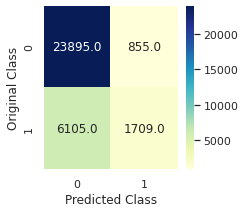

Precision :  0.6665366614664586
Recall :  0.21871000767852572
-------------------- Confusion matrix --------------------


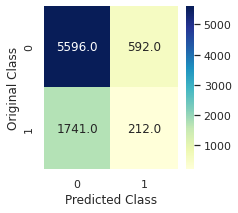

Precision :  0.263681592039801
Recall :  0.10855094726062468
-------------------- Confusion matrix --------------------


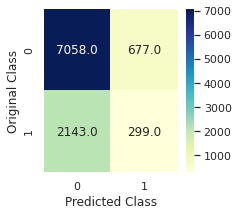

Precision :  0.30635245901639346
Recall :  0.12244062244062244


In [ ]:
best_alpha = np.argmax(cv_log_error_array)
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf= 25, min_samples_split= 100)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y_tr = sig_clf.predict_proba(train_df)[:,1]
print("The train roc auc score is:",roc_auc_score(y_train, predict_y_tr))
predict_y_cv = sig_clf.predict_proba(cv_df)[:,1]
print("The cross validation roc auc score is:",roc_auc_score(y_cv, predict_y_cv ))
predict_y_te = sig_clf.predict_proba(test_df)[:,1]
print("The test roc auc score is:",roc_auc_score(y_test, predict_y_te))
 

plot_confusion_matrix(test_y = y_train, predict_y =sig_clf.predict(train_df) )
plot_confusion_matrix(test_y=y_cv, predict_y = sig_clf.predict(cv_df))
plot_confusion_matrix(test_y=y_test, predict_y = sig_clf.predict(test_df))


Roc AUC score : 0.5814947153385756
Number of mis-classified points : 0.2865741309421447
-------------------- Confusion matrix --------------------


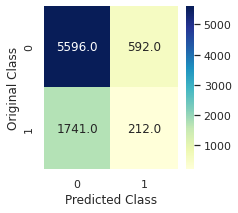

Precision :  0.263681592039801
Recall :  0.10855094726062468


In [ ]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf= 25, min_samples_split= 100)
predict_and_plot_confusion_matrix(train_df, y_train , cv_df, y_cv, clf)

# 5. Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [100,200,500,1000,2000] #[200.,400.,600.,800.,1000.,1200.,1400.,1600.,1800.,2000.]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [5,10,20,30,40,50]  #[10.,20.,30.,40.,50.,60.,70.,80.,90.,100.,110.]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {
               'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
               }# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(n_jobs = -1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='roc_auc', n_iter = 100, cv = 3,return_train_score=True, verbose=2, random_state=42)

grid_search.fit(train_df,y_train)

print('best parameter : ',grid_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40, total=   7.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40, total=   6.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_depth=40, total=   6.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5, total=  11.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5, total=  11.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_depth=5, total=  11.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_depth=30, total=  29.9s
[CV] n_estimators=1000, min_samples_split=10,

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 135.8min finished


best parameter :  {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}


In [ ]:
print('best parameter : ',grid_search.best_params_)

best parameter :  {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}


-------------------- Confusion matrix --------------------


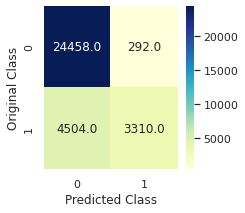

Precision :  0.9189339255968906
Recall :  0.42359866905554133
-------------------- Confusion matrix --------------------


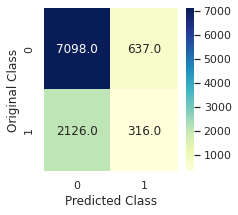

Precision :  0.3315844700944386
Recall :  0.1294021294021294
Train ROC_AUC: 0.9699512193860798
Test ROC_AUC: 0.6012543894896836


In [ ]:
rf = RandomForestClassifier(n_estimators=3000 ,min_samples_leaf=5,min_samples_split=10,max_depth=40,n_jobs = -1)
rf.fit(train_df,y_train)

y_pred_tr =rf.predict_proba(train_df)[:,1]
y_pred_te = rf.predict_proba(test_df)[:,1]


plot_confusion_matrix(test_y=y_train, predict_y = rf.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = rf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

#30 ---->0.6264

# 6. XGBOOST

In [ ]:
!pip3 install xgboost

In [ ]:
'''
Here we evaluate model performance . We use here xgboost cv function that will do crossvalidation for us
and will gives us number of boosting round required for training xgboost .And that we will use as number of trees or n_estimator.
'''


def evaluate(xgb1,X_train,y_train,X_test,y_test):
  xgb_param = xgb1.get_xgb_params()

  xgb_train = xgb.DMatrix(X_train,y_train)
  cvresult = xgb.cv(xgb_param,xgb_train,num_boost_round=xgb1.get_params()['n_estimators'],nfold = 5,metrics='auc',
                  early_stopping_rounds=100)
  #print(cvresult)

  xgb1.set_params(n_estimators=cvresult.shape[0])
  print('Number of estimators: ',cvresult.shape[0])

  xgb1.fit(X_train,y_train,eval_metric='auc')

  y_train_pred = xgb1.predict_proba(X_train)[:,1]
  y_test_pred = xgb1.predict_proba(X_test)[:,1]


  train_score =  roc_auc_score(y_train,y_train_pred )
  test_score = roc_auc_score(y_test,y_test_pred)

  print('train roc_auc_score = ',train_score)
  print('test roc_auc_score = ',test_score)

In [ ]:
xgb1 = xgb.XGBClassifier(learning_rate =0.1,n_estimators=5000,max_depth=5,min_child_weight=1,
                      gamma=0,subsample=0.8,colsample_bytree=0.8,tree_method='gpu_hist',
                      prdictor = 'gpu_predictor',objective = 'binary:logistic',nthread=4)


evaluate(xgb1,train_df,y_train,test_df,y_test)

Number of estimators:  170
train roc_auc_score =  0.8229461572468995
test roc_auc_score =  0.5862999215940392


## Hyper Parameter Tunning:

1. max_depth and min_child_weight:

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.1,max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
              n_jobs=1, nthread=None, objective='binary:logistic',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1)

gsearch1 = GridSearchCV(estimator =clf,param_grid = param_test1,scoring='roc_auc',cv = 5,verbose=3)
gsearch1.fit(train_df,y_train)
gsearch1.best_params_,gsearch1.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... max_depth=3, min_child_weight=1, score=0.761, total=   1.5s
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ..... max_depth=3, min_child_weight=1, score=0.757, total=   1.5s
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] ..... max_depth=3, min_child_weight=1, score=0.753, total=   1.5s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.765, total=   1.5s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] ..... max_depth=3, min_child_weight=1, score=0.766, total=   1.5s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.761, total=   1.5s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.756, total=   1.5s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.754, total=   1.5s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] ..... max_depth=3, min_child_weight=3, score=0.766, total=   1.5s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.3min finished


({'max_depth': 5, 'min_child_weight': 3},
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.8, tree_method='gpu_hist', verbosity=1))

-------------------- Confusion matrix --------------------


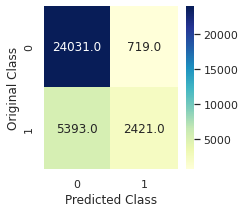

Precision :  0.7710191082802548
Recall :  0.3098285129255183
-------------------- Confusion matrix --------------------


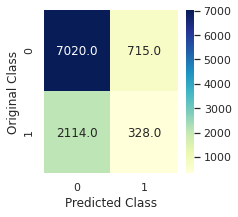

Precision :  0.3144774688398849
Recall :  0.13431613431613432
Train ROC_AUC: 0.8495162037575654
Test ROC_AUC: 0.5823689823689824


In [ ]:
 clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.8, tree_method='gpu_hist', verbosity=1)
 

clf.fit(train_df,y_train)


y_pred_tr =clf.predict_proba(train_df)[:,1]
y_pred_te = clf.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = clf.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

2. gamma : 

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=2, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.8, tree_method='gpu_hist', verbosity=1)
 

gsearch1 = GridSearchCV(estimator =clf,param_grid = param_test3,scoring='roc_auc',cv = 5,verbose=3)
gsearch1.fit(train_df,y_train)

gsearch1.best_params_,gsearch1.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] gamma=0.0 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... gamma=0.0, score=0.759, total=   1.8s
[CV] gamma=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ........................... gamma=0.0, score=0.756, total=   1.7s
[CV] gamma=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] ........................... gamma=0.0, score=0.755, total=   1.7s
[CV] gamma=0.0 .......................................................
[CV] ........................... gamma=0.0, score=0.767, total=   1.7s
[CV] gamma=0.0 .......................................................
[CV] ........................... gamma=0.0, score=0.764, total=   1.7s
[CV] gamma=0.1 .......................................................
[CV] ........................... gamma=0.1, score=0.759, total=   1.7s
[CV] gamma=0.1 .......................................................
[CV] ........................... gamma=0.1, score=0.756, total=   1.7s
[CV] gamma=0.1 .......................................................
[CV] ........................... gamma=0.1, score=0.755, total=   1.7s
[CV] gamma=0.1 .......................................................
[CV] ........................... gamma=0.1, score=0.767, total=   1.7s
[CV] gamma=0.1 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   43.4s finished


({'gamma': 0.0},
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=2, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.8, tree_method='gpu_hist', verbosity=1))

3. subsample and colsample_bytree:

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(5,11)],
 'colsample_bytree':[i/10.0 for i in range(5,11)],

}



clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=2, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.8, tree_method='gpu_hist', verbosity=1)
 

gsearch1 = GridSearchCV(estimator =clf,param_grid = param_test4,scoring='roc_auc',cv = 5,verbose=3)
gsearch1.fit(train_df,y_train)

gsearch1.best_params_,gsearch1.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] colsample_bytree=0.5, subsample=0.5 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . colsample_bytree=0.5, subsample=0.5, score=0.754, total=   1.8s
[CV] colsample_bytree=0.5, subsample=0.5 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] . colsample_bytree=0.5, subsample=0.5, score=0.752, total=   1.7s
[CV] colsample_bytree=0.5, subsample=0.5 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] . colsample_bytree=0.5, subsample=0.5, score=0.748, total=   1.7s
[CV] colsample_bytree=0.5, subsample=0.5 .............................
[CV] . colsample_bytree=0.5, subsample=0.5, score=0.763, total=   1.7s
[CV] colsample_bytree=0.5, subsample=0.5 .............................
[CV] . colsample_bytree=0.5, subsample=0.5, score=0.762, total=   1.7s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV] . colsample_bytree=0.5, subsample=0.6, score=0.757, total=   1.7s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV] . colsample_bytree=0.5, subsample=0.6, score=0.755, total=   1.7s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV] . colsample_bytree=0.5, subsample=0.6, score=0.752, total=   1.7s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV] . colsample_bytree=0.5, subsample=0.6, score=0.765, total=   1.7s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  5.2min finished


({'colsample_bytree': 0.5, 'subsample': 0.9},
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=2, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1))

-------------------- Confusion matrix --------------------


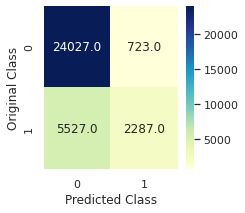

Precision :  0.7598006644518273
Recall :  0.29267980547734834
-------------------- Confusion matrix --------------------


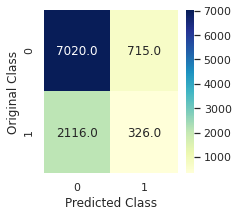

Precision :  0.31316042267050914
Recall :  0.1334971334971335
Train ROC_AUC: 0.8424248784233428
Test ROC_AUC: 0.5840110075404193


In [ ]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)

clf.fit(train_df,y_train)


y_pred_tr =clf.predict_proba(train_df)[:,1]
y_pred_te = clf.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = clf.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

4. reg_alpha and reg_lambda:

In [ ]:
param_test6 = {
 'reg_alpha':[1e-2, 0.1 ,0, 1, 10, 100],
 'reg_lambda':[1e-2, 0.1 ,0 ,1 ,10 , 100]
}

clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)
 

gsearch1 = GridSearchCV(estimator =clf,param_grid = param_test6,scoring='roc_auc',cv = 5,verbose=3)
gsearch1.fit(train_df,y_train)

gsearch1.best_params_,gsearch1.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] reg_alpha=0.01, reg_lambda=0.01 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... reg_alpha=0.01, reg_lambda=0.01, score=0.762, total=   1.8s
[CV] reg_alpha=0.01, reg_lambda=0.01 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ..... reg_alpha=0.01, reg_lambda=0.01, score=0.758, total=   1.7s
[CV] reg_alpha=0.01, reg_lambda=0.01 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] ..... reg_alpha=0.01, reg_lambda=0.01, score=0.754, total=   1.7s
[CV] reg_alpha=0.01, reg_lambda=0.01 .................................
[CV] ..... reg_alpha=0.01, reg_lambda=0.01, score=0.765, total=   1.7s
[CV] reg_alpha=0.01, reg_lambda=0.01 .................................
[CV] ..... reg_alpha=0.01, reg_lambda=0.01, score=0.768, total=   1.7s
[CV] reg_alpha=0.01, reg_lambda=0.1 ..................................
[CV] ...... reg_alpha=0.01, reg_lambda=0.1, score=0.762, total=   1.7s
[CV] reg_alpha=0.01, reg_lambda=0.1 ..................................
[CV] ...... reg_alpha=0.01, reg_lambda=0.1, score=0.759, total=   1.7s
[CV] reg_alpha=0.01, reg_lambda=0.1 ..................................
[CV] ...... reg_alpha=0.01, reg_lambda=0.1, score=0.757, total=   1.7s
[CV] reg_alpha=0.01, reg_lambda=0.1 ..................................
[CV] ...... reg_alpha=0.01, reg_lambda=0.1, score=0.767, total=   1.7s
[CV] reg_alpha=0.01, reg_lambda=0.1 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  5.0min finished


({'reg_alpha': 10, 'reg_lambda': 0},
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=10,
               reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1))

-------------------- Confusion matrix --------------------


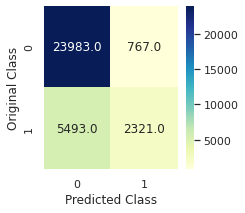

Precision :  0.751619170984456
Recall :  0.2970309700537497
-------------------- Confusion matrix --------------------


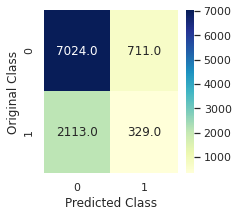

Precision :  0.31634615384615383
Recall :  0.13472563472563473
Train ROC_AUC: 0.8395851243429948
Test ROC_AUC: 0.5859408741761684


In [ ]:
clf =xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=10,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)

clf.fit(train_df,y_train)


y_pred_tr =clf.predict_proba(train_df)[:,1]
y_pred_te = clf.predict_proba(test_df)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train, predict_y = clf.predict(train_df))
plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

In [ ]:
clf =xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.05, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=10,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)
evaluate(clf ,train_df,y_train,test_df,y_test)

Number of estimators:  387
train roc_auc_score =  0.8175145258575
test roc_auc_score =  0.5847520523991112


# 7. LGBM

In [ ]:
import lightgbm as lgb
d_train = lgb.Dataset(train_df,label = y_train)


lgbm_params = {'learning_rate':0.05,'boosting_type':'gbdt',
                'objective':'binary','metric':'auc','min_data_in_leaf':5 ,
               'num_levels':50,'max_depth':10,'scale_pos_weight':0.33}

clf = lgb.train(lgbm_params,d_train,500)
pred_tr = clf.predict(train_df)
pred_te = clf.predict(test_df)


#plot_confusion_matrix(test_y=y_train_res, predict_y = clf.predict(train_df))
#plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train,pred_tr ))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test,pred_te ))

Train ROC_AUC: 0.8897129394792563
Test ROC_AUC: 0.5942752001575531


# **B. Target Encoding:**

In [67]:
train_df.columns

Index(['Region_code_0', 'Region_code_1', 'City_Code_0', 'City_Code_1',
       'Health Indicator_0', 'Health Indicator_1', 'Holding_Policy_Duration_0',
       'Holding_Policy_Duration_1', 'Accomodation_type_Owned',
       'Accomodation_type_Rented', 'Is_Spouse_No', 'Is_Spouse_Yes',
       'Holding_Policy_Type_0', 'Holding_Policy_Type_1', 'Reco_Policy_Cat_0',
       'Reco_Policy_Cat_1', 'Reco_Policy_Premium', 'Upper_Age', 'Lower_Age'],
      dtype='object')

In [68]:
train_df1 = train_df.drop(['Region_code_0','City_Code_0','Health Indicator_0','Holding_Policy_Duration_0','Holding_Policy_Type_0','Reco_Policy_Cat_0','Reco_Policy_Cat_0'],axis = 1)

In [69]:
train_df1.head()

,Region_code_1,City_Code_1,Health Indicator_1,Holding_Policy_Duration_1,Accomodation_type_Owned,Accomodation_type_Rented,Is_Spouse_No,Is_Spouse_Yes,Holding_Policy_Type_1,Reco_Policy_Cat_1,Reco_Policy_Premium,Upper_Age,Lower_Age
0,0.476190,0.228942,0.236130,0.240987,1.0,0.0,0.0,1.0,0.240987,0.252525,0.752768,0.715885,0.697495
1,0.416667,0.247481,0.236130,0.219547,1.0,0.0,1.0,0.0,0.236793,0.326540,0.555814,0.576828,0.609090
2,0.424242,0.247481,0.236130,0.240987,1.0,0.0,1.0,0.0,0.240987,0.190696,0.768522,0.831863,0.576719
3,0.392857,0.247481,0.244866,0.219547,1.0,0.0,1.0,0.0,0.236802,0.224478,0.550970,0.593713,0.624689
4,0.392857,0.226115,0.244866,0.240987,0.0,1.0,1.0,0.0,0.240987,0.326540,0.290743,0.230187,0.288878


In [70]:

cv_df1 = cv_df.drop(['Region_code_0','City_Code_0','Health Indicator_0','Holding_Policy_Duration_0','Holding_Policy_Type_0','Reco_Policy_Cat_0','Reco_Policy_Cat_0'],axis = 1)
test_df1 = test_df.drop(['Region_code_0','City_Code_0','Health Indicator_0','Holding_Policy_Duration_0','Holding_Policy_Type_0','Reco_Policy_Cat_0','Reco_Policy_Cat_0'],axis = 1)

In [71]:
train_df1 = train_df1.append(cv_df1, ignore_index = True) 
train_df1.shape

(40705, 13)

In [72]:
y_train1 = y_train.append(y_cv,ignore_index = True)
y_train1.shape

(40705,)

# 1. Random Forest

-------------------- Confusion matrix --------------------


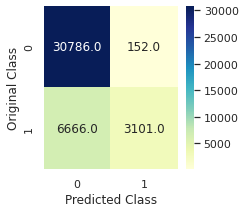

Precision :  0.9532739010144482
Recall :  0.31749769632435754
-------------------- Confusion matrix --------------------


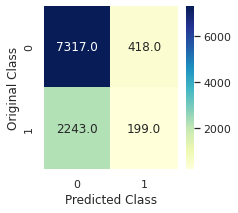

Precision :  0.3225283630470016
Recall :  0.08149058149058148
Train ROC_AUC: 0.9705031295379245
Test ROC_AUC: 0.6060047001223472


In [48]:
rf = RandomForestClassifier(n_estimators=3000 ,min_samples_leaf=5,min_samples_split=10,max_depth=40,n_jobs = -1)
rf.fit(train_df1,y_train1)

y_pred_tr =rf.predict_proba(train_df1)[:,1]
y_pred_te = rf.predict_proba(test_df1)[:,1]


plot_confusion_matrix(test_y=y_train1, predict_y = rf.predict(train_df1))
plot_confusion_matrix(test_y=y_test, predict_y = rf.predict(test_df1))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train1, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

#30 ---->0.6264

## 2. XGBOOST

-------------------- Confusion matrix --------------------


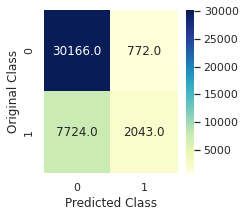

Precision :  0.7257548845470693
Recall :  0.20917374833623426
-------------------- Confusion matrix --------------------


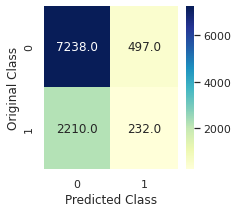

Precision :  0.31824417009602196
Recall :  0.095004095004095
Train ROC_AUC: 0.8028009287813382
Test ROC_AUC: 0.6015598603833898


In [50]:
clf =xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.5, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=7,
               min_child_weight=3, missing=None, n_estimators=300, n_jobs=1,
               nthread=None, objective='binary:logistic',
               prdictor='gpu_predictor', random_state=0, reg_alpha=10,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
               subsample=0.9, tree_method='gpu_hist', verbosity=1)

clf.fit(train_df1,y_train1)


y_pred_tr =clf.predict_proba(train_df1)[:,1]
y_pred_te = clf.predict_proba(test_df1)[:,1]
#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?

plot_confusion_matrix(test_y=y_train1, predict_y = clf.predict(train_df1))
plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df1))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train1, y_pred_tr))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test, y_pred_te))

## 3. LGBM

In [52]:
import lightgbm as lgb
d_train = lgb.Dataset(train_df1,label = y_train1)


lgbm_params = {'learning_rate':0.05,'boosting_type':'gbdt',
                'objective':'binary','metric':'auc','min_data_in_leaf':5 ,
               'num_levels':50,'max_depth':10,'scale_pos_weight':0.33}

clf = lgb.train(lgbm_params,d_train,500)
pred_tr = clf.predict(train_df1)
pred_te = clf.predict(test_df1)


#plot_confusion_matrix(test_y=y_train_res, predict_y = clf.predict(train_df))
#plot_confusion_matrix(test_y=y_test, predict_y = clf.predict(test_df))

print("Train ROC_AUC:",metrics.roc_auc_score(y_train1,pred_tr ))
print("Test ROC_AUC:",metrics.roc_auc_score(y_test,pred_te ))

Train ROC_AUC: 0.8594546140537713
Test ROC_AUC: 0.6058836500012971
